In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
df=pd.read_csv('amazon_india_2016.csv')
df

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
0,TXN_2016_00000001,2016-01-27,CUST_2016_00002571,PROD_000124,Apple iPhone SE 16GB White,Electronics,Smartphones,Apple,101945.03,0.00,101945.03,3,305835.09,0.0,305835.09,Pune,Maharashtra,Tier1,Standard,26-35,COD,3,Standard,False,False,NaN,NaN,Delivered,1,2016,1,0.23,True,4.6
1,TXN_2016_00000002,2016-01-07,CUST_2016_00003513,PROD_001612,Apple Pavilion 8GB RAM Silver,Electronics,Laptops,Apple,52750.75,14.72,44987.09,2,89974.19,0.0,89974.19,Lucknow,Uttar Pradesh,Tier1,Budget,36-45,COD,15,Standard,False,False,NaN,NaN,Delivered,1,2016,1,2.69,True,3.7
2,TXN_2016_00000003,2016-01-28,CUST_2015_00001993,PROD_001751,Realme Slate 4GB RAM Black,Electronics,Tablets,Realme,18238.6,0.00,18238.60,3,54715.80,0.0,54715.80,Mumbai,Maharashtra,Metro,Standard,36-45,COD,5,Standard,False,False,NaN,5.0,Delivered,1,2016,1,0.59,True,3.9
3,TXN_2016_00000004,25-01-2016,CUST_2016_00003593,PROD_000154,Samsung Galaxy J7 Prime 16GB Gold,Electronics,Smartphones,Samsung,33118.39,44.96,18228.86,1,18228.86,0.0,18228.86,Ahmedabad,Gujarat,Tier1,Budget,18-25,Credit Card,5,Standard,False,True,Republic Day Sale,4.5,Delivered,1,2016,1,0.17,TRUE,3.4
4,TXN_2016_00000005,2016-01-26,CUST_2016_00015048,PROD_001710,Lenovo Tab M10 8GB RAM Black,Electronics,Tablets,Lenovo,59718.16,49.77,29997.57,1,29997.57,0.0,29997.57,Delhi,Delhi,Metro,Standard,18-25,COD,4,Standard,False,True,Republic Day Sale,NaN,Delivered,1,2016,1,0.49,True,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55270,TXN_2016_00033747_DUP,2016-09-18,CUST_2016_00010850,PROD_000173,Xiaomi Redmi Note 3 64GB Black,Electronics,Smartphones,Xiaomi,23390.04,0.00,23390.04,1,23390.04,0.0,23390.04,Mumbai,Maharashtra,Metro,Budget,36-45,COD,4,Standard,False,False,NaN,3.5,Cancelled,9,2016,3,0.19,True,4.0
55271,TXN_2016_00000820_DUP,2016-01-31,CUST_2015_00005129,PROD_000032,Samsung Galaxy S6 Edge 16GB White,Electronics,Smartphones,Samsung,"Rs 98,446",0.00,98445.97,1,98445.97,0.0,98445.97,Visakhapatnam,Andhra Pradesh,Tier2,Standard,26-35,COD,7,Standard,False,False,NaN,4.0,Delivered,1,2016,1,0.20,True,4.3
55272,TXN_2016_00041552_DUP,2016-10-04,CUST_2016_00008270,PROD_001570,ASUS Inspiron 4GB RAM Black,Electronics,Laptops,ASUS,"Rs 116,389",29.52,82025.49,1,82025.49,0.0,82025.49,Kolkata,West Bengal,Metro,Standard,NaN,COD,4,Standard,False,True,Amazon Great Indian Festival,NaN,Delivered,10,2016,4,1.40,True,4.7
55273,TXN_2016_00052683_DUP,2016-12-23,CUST_2015_00010567,PROD_001596,Acer VivoBook 4GB RAM Silver,Electronics,Laptops,Acer,91276.9,0.00,91276.90,2,182553.80,0.0,182553.80,Mumbai,Maharashtra,Metro,Premium,NaN,COD,4,Standard,False,False,NaN,NaN,Delivered,12,2016,4,2.01,No,3.6


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55275 entries, 0 to 55274
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          55275 non-null  object 
 1   order_date              55275 non-null  object 
 2   customer_id             55275 non-null  object 
 3   product_id              55275 non-null  object 
 4   product_name            55275 non-null  object 
 5   category                55275 non-null  object 
 6   subcategory             55275 non-null  object 
 7   brand                   55275 non-null  object 
 8   original_price_inr      55275 non-null  object 
 9   discount_percent        55275 non-null  float64
 10  discounted_price_inr    55275 non-null  float64
 11  quantity                55275 non-null  int64  
 12  subtotal_inr            55275 non-null  float64
 13  delivery_charges        50851 non-null  float64
 14  final_amount_inr        55275 non-null

#Question 1
Your dataset contains order_date in multiple formats: 'DD/MM/YYYY', 'DD-MM-YY', 'YYYY-MM-DD', and some invalid entries like '32/13/2020'. Clean and standardize all dates to 'YYYY-MM-DD' format, handling invalid dates appropriately.


In [3]:
df['order_date']=df['order_date'].str.replace(r'(\d+)(st|nd|rd|th)', r'\1', regex=True)
df['order_date']

,order_date
0,2016-01-27
1,2016-01-07
2,2016-01-28
3,25-01-2016
4,2016-01-26
...,...
55270,2016-09-18
55271,2016-01-31
55272,2016-10-04
55273,2016-12-23


In [4]:
df['order_date'].isnull().sum()

np.int64(0)

In [5]:
mask = df['order_date'].str.match(r'^\d{4}-\d{2}-\d{2}$')

df.loc[mask,'order_date']=pd.to_datetime(df.loc[mask, 'order_date'], format='%Y-%m-%d', errors='coerce')
df['order_date']

,order_date
0,2016-01-27 00:00:00
1,2016-01-07 00:00:00
2,2016-01-28 00:00:00
3,25-01-2016
4,2016-01-26 00:00:00
...,...
55270,2016-09-18 00:00:00
55271,2016-01-31 00:00:00
55272,2016-10-04 00:00:00
55273,2016-12-23 00:00:00


In [6]:
df['order_date']=pd.to_datetime(df['order_date'], format='%Y-%m-%d', errors='coerce')
df['order_date']

,order_date
0,2016-01-27
1,2016-01-07
2,2016-01-28
3,NaT
4,2016-01-26
...,...
55270,2016-09-18
55271,2016-01-31
55272,2016-10-04
55273,2016-12-23


#Question 2
The original_price_inr column contains mixed data types: numeric values, text with '₹' symbols, comma separators ('₹1,25,000'), and some entries like 'Price on Request'. Clean this column to contain only numeric values in Indian Rupees.


In [7]:
df['original_price_inr']=df['original_price_inr'].str.replace(r'[^\d.]','',regex=True)
df['original_price_inr']=df['original_price_inr'].astype('float')
df['original_price_inr']

,original_price_inr
0,101945.03
1,52750.75
2,18238.60
3,33118.39
4,59718.16
...,...
55270,23390.04
55271,98446.00
55272,116389.00
55273,91276.90


In [8]:
df['original_price_inr'].isnull().sum()

np.int64(0)

#Question 3
Customer ratings appear in various formats: '5.0', '4 stars', '3/5', '2.5/5.0', and some missing values. Standardize all ratings to numeric scale 1.0-5.0, handling inconsistent formats and missing values strategically.


In [9]:
df['customer_rating'].unique()

array([nan, '5.0', '4.5', '4.0', '3.5', '3.0', '4/5', '3/5', '5.0 stars',
       '4.5 stars', '4.5/5.0', '4.0 stars', '3.5 stars', '4', '4.0/5.0',
       '3.0 stars', '5/5', '3', '5.0/5.0', '3.0/5.0', '5', '3.5/5.0'],
      dtype=object)

In [10]:
df['customer_rating']=df['customer_rating'].str.replace(r'[\/ ].*','',case=False,regex=True).str.strip()

In [11]:
df['customer_rating'].isnull().sum()

np.int64(16764)

In [12]:
df['customer_rating']=df['customer_rating'].replace('',np.nan)

In [13]:
df['customer_rating']=df['customer_rating'].astype(float)

In [14]:
df['customer_rating']

,customer_rating
0,NaN
1,NaN
2,5.0
3,4.5
4,NaN
...,...
55270,3.5
55271,4.0
55272,NaN
55273,NaN


In [15]:
df['customer_rating'].isnull().sum()

np.int64(16764)

In [16]:
df['customer_rating'].mean()
# df['customer_rating'].median()
# df['customer_rating'].mode()

np.float64(4.3162343226610576)

In [17]:
df['customer_rating']=df['customer_rating'].fillna(df['customer_rating'].mean())

In [18]:
df['customer_rating'].isnull().sum()

np.int64(0)

#Question 4
The customer_city column has inconsistent naming: 'Bangalore/Bengaluru', 'Mumbai/Bombay', 'Delhi/New Delhi', along with spelling errors and case variations. Standardize all city names and handle geographical variations.


In [19]:
df['customer_city'].unique()

array(['Pune', 'Lucknow', 'Mumbai', 'Ahmedabad', 'Delhi', 'Chennai',
       'Surat', 'Vadodara', 'Coimbatore', 'Kolkata', 'Indore',
       'Saharanpur', 'Chandigarh', 'Bangalore', 'Patna', 'Madras',
       'Bhubaneswar', 'Jaipur', 'Nagpur', 'Allahabad', 'Kanpur',
       'Visakhapatnam', 'Hyderabad', 'Kolkata ', 'Ludhiana', 'Varanasi',
       'BANGALORE', 'Kochi', 'Moradabad', 'Meerut', 'Bareilly', 'CHENNAI',
       'kolkata', 'New Delhi', 'Aligarh', 'Gorakhpur', 'Bengalore',
       'MUMBAI', 'chenai', 'Bengaluru', 'Calcutta', 'Mumbai ', 'DELHI',
       'Banglore', 'Delhi NCR', 'Bombay', 'KOLKATA', 'delhi', 'mumba',
       'Chennai '], dtype=object)

In [20]:
!pip install fuzzywuzzy

In [21]:
from fuzzywuzzy import process  # pip install thefuzz

def clean_city_names(df, column):

    manual_mapping = {
        # Mumbai
        'bombay': 'Mumbai',
        'mumba': 'Mumbai',
        'mumbai ': 'Mumbai',
        'mumabi': 'Mumbai',

        # Bengaluru
        'bangalore': 'Bengaluru',
        'banglore': 'Bengaluru',
        'bengalore': 'Bengaluru',

        # Delhi
        'new delhi': 'Delhi',
        'delhi ncr': 'Delhi',
        'delhi ': 'Delhi',

        # Chennai
        'madras': 'Chennai',
        'chenai': 'Chennai',
        'chennai ': 'Chennai',

        # Kolkata
        'calcutta': 'Kolkata',
        'kolkata ': 'Kolkata',
        'kolkata': 'Kolkata',  # lowercase variant
        'kolkatta': 'Kolkata',
    }

    master_list= [
        'Pune', 'Chandigarh', 'Ludhiana', 'Bengaluru', 'Kochi', 'Mumbai',
        'Kanpur', 'Patna', 'Bhubaneswar', 'Delhi', 'Nagpur', 'Indore',
        'Ahmedabad', 'Chennai', 'Kolkata', 'Gorakhpur', 'Visakhapatnam',
        'Hyderabad', 'Lucknow', 'Varanasi', 'Moradabad', 'Jaipur', 'Surat',
        'Coimbatore', 'Vadodara', 'Meerut', 'Aligarh', 'Bareilly', 'Saharanpur',
        'Allahabad'
    ]
    master_list_lower = [c.lower() for c in master_list]


    df[column] = df[column].astype(str).str.lower().str.strip()
    df[column] = df[column].replace({"nan": pd.NA})

    df[column] = df[column].replace(manual_mapping)

    def match_city(city):
        if pd.isna(city):
            return city
        best_match, score = process.extractOne(city, master_list_lower)
        return best_match if score > 85 else city

    df[column] = df[column].apply(match_city)


    df[column] = df[column].apply(lambda x: x.title() if pd.notna(x) else x)

    return df[column]


/usr/local/lib/python3.12/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [22]:
# Get unique city names
unique_cities = df['customer_city'].unique()

# Apply the cleaning function to unique city names
cleaned_unique_cities = [clean_city_names(pd.DataFrame({'city': [city]}), 'city').iloc[0] for city in unique_cities]

# Create a mapping dictionary
city_mapping = dict(zip(unique_cities, cleaned_unique_cities))

# Map the cleaned names back to the original column
df['customer_city'] = df['customer_city'].map(city_mapping)

display(df['customer_city'].unique())

array(['Pune', 'Lucknow', 'Mumbai', 'Ahmedabad', 'Delhi', 'Chennai',
       'Surat', 'Vadodara', 'Coimbatore', 'Kolkata', 'Indore',
       'Saharanpur', 'Chandigarh', 'Bengaluru', 'Patna', 'Bhubaneswar',
       'Jaipur', 'Nagpur', 'Allahabad', 'Kanpur', 'Visakhapatnam',
       'Hyderabad', 'Ludhiana', 'Varanasi', 'Kochi', 'Moradabad',
       'Meerut', 'Bareilly', 'Aligarh', 'Gorakhpur'], dtype=object)

In [23]:
df['customer_city'].unique()

array(['Pune', 'Lucknow', 'Mumbai', 'Ahmedabad', 'Delhi', 'Chennai',
       'Surat', 'Vadodara', 'Coimbatore', 'Kolkata', 'Indore',
       'Saharanpur', 'Chandigarh', 'Bengaluru', 'Patna', 'Bhubaneswar',
       'Jaipur', 'Nagpur', 'Allahabad', 'Kanpur', 'Visakhapatnam',
       'Hyderabad', 'Ludhiana', 'Varanasi', 'Kochi', 'Moradabad',
       'Meerut', 'Bareilly', 'Aligarh', 'Gorakhpur'], dtype=object)

#Question 5
Boolean columns (is_prime_member, is_prime_eligible, is_festival_sale) contain mixed values: True/False, Yes/No, 1/0, Y/N, and some missing entries. Convert all boolean columns to consistent True/False format.


In [24]:
df['is_prime_member'].unique()

array(['False', '0', 'FALSE', 'No', 'True', '1', 'TRUE', 'Yes'],
      dtype=object)

In [25]:
df['is_prime_eligible'].unique()

array(['True', 'TRUE', 'False', 'Yes', '1', 'No', '0', 'FALSE'],
      dtype=object)

In [26]:
df['is_festival_sale'].unique()

array(['False', 'True', 'FALSE', 'No', 'Yes', 'TRUE', '1', '0'],
      dtype=object)

In [27]:
import pandas as pd

def make_true_false(x):

    if pd.isna(x):
        return pd.NA

    x = str(x).strip().upper()

    if x in ['NAN', 'NONE', 'NULL', '']:
        return pd.NA

    if x in ['NO', 'FALSE', '0']:
        return False
    elif x in ['YES', 'TRUE', '1']:
        return True

    return pd.NA


In [28]:
df['is_festival_sale']=df['is_festival_sale'].apply(make_true_false)
df['is_prime_eligible']=df['is_prime_eligible'].apply(make_true_false)
df['is_prime_member']=df['is_prime_member'].apply(make_true_false)

In [29]:
print(df['is_festival_sale'].unique())
print(df['is_prime_eligible'].unique())
print(df['is_prime_member'].unique())

[False  True]
[ True False]
[False  True]


#Question 6
Product categories have variations: 'Electronics/Electronic/ELECTRONICS/Electronics & Accessories'. Standardize category names across the dataset and ensure consistent naming conventions.


In [30]:
df['category'].unique()

array(['Electronics', 'Electronics & Accessories', 'ELECTRONICS',
       'Electronicss', 'Electronic'], dtype=object)

In [31]:
mapping_cat = {
    'electronics': 'Electronics',
    'electronic': 'Electronics',
    # 'Electronics & Accessories': 'Electronics',
    'ELECTRONICS':'Electronics',
    'Electronic':'Electronics',
    'Electronicss':'Electronics'

}

In [32]:
df['category']=df['category'].replace(mapping_cat)

In [33]:
df['category'].unique()

array(['Electronics', 'Electronics & Accessories'], dtype=object)

#Question 7
The delivery_days column contains negative values, text entries like 'Same Day', '1-2 days', and some unrealistic values like 50 days. Clean this column to contain only valid numeric delivery days.


In [34]:
df['delivery_days'].unique()

array(['3', '15', '5', '4', '7', '6', '0', '1', '1-2 days', '-1',
       'Same Day', '2', 'Express'], dtype=object)

In [35]:
df.loc[df['delivery_days'].str.contains(r'[1-2|same day]',case=False,na=False),'delivery_days'].sample(10)

,delivery_days
49428,-1
13990,-1
34313,1
53416,1
52909,2
22579,1
26297,2
3430,-1
23961,-1
53379,1-2 days


In [36]:
df['delivery_days']=df['delivery_days'].str.replace('1-2','2',case=False)
df['delivery_days']=df['delivery_days'].str.replace('Same Day','1',case=False)
df['delivery_days']=df['delivery_days'].str.replace('Express','',case=False)
df['delivery_days']=df['delivery_days'].str.replace('-','',case=False)
df['delivery_days']=df['delivery_days'].str.replace('2 days','2',case=False)

In [37]:
df['delivery_days'] = df['delivery_days'].replace('', np.nan)
df['delivery_days'] = pd.to_numeric(df['delivery_days'], errors='coerce')
display(df['delivery_days'].unique())

array([ 3., 15.,  5.,  4.,  7.,  6.,  0.,  1.,  2., nan])

In [38]:
df['delivery_days'].isnull().sum()

np.int64(115)

In [39]:
df['delivery_days'] = df['delivery_days'].fillna(df['delivery_days'].mean()).astype(int)

In [40]:
df['delivery_days'].isnull().sum()


np.int64(0)

In [41]:
df['delivery_days'].head()

,delivery_days
0,3
1,15
2,5
3,5
4,4


#Question 8
Identify and handle duplicate transactions where the same customer, product, date, and amount appear multiple times. Some duplicates are genuine (bulk orders) while others are data errors. Develop a strategy to distinguish and handle both cases.


In [42]:
df[df.duplicated(subset=['customer_id', 'product_id', 'order_date', 'final_amount_inr'], keep=False)]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
154,TXN_2016_00000155,2016-01-07,CUST_2016_00015802,PROD_001728,Xiaomi Slate 4GB RAM Silver,Electronics,Tablets,Xiaomi,19495.69,14.79,16611.39,1,16611.39,0.0,16611.39,Mumbai,Maharashtra,Metro,Standard,36-45,Net Banking,7,Standard,False,False,NaN,4.316234,Returned,1,2016,1,0.49,True,4.2
227,TXN_2016_00000228,2016-01-04,CUST_2015_00004528,PROD_000053,OnePlus OnePlus 2 32GB Black,Electronics,Smartphones,OnePlus,101191.52,0.00,101191.52,1,101191.52,NaN,101191.52,Chennai,Tamil Nadu,Metro,Standard,26-35,COD,3,Standard,False,False,NaN,4.316234,Delivered,1,2016,1,0.20,True,4.6
253,TXN_2016_00000254,2016-01-19,CUST_2016_00011800,PROD_000196,Motorola Moto G4 16GB Gold,Electronics,Smartphones,Motorola,23992.60,0.00,23992.60,1,23992.60,0.0,23992.60,Mumbai,Maharashtra,Metro,Standard,46-55,COD,7,Standard,False,False,NaN,4.500000,Delivered,1,2016,1,0.16,True,3.8
567,TXN_2016_00000568,2016-01-09,CUST_2015_00008529,PROD_000037,Samsung Galaxy Note 5 16GB Black,Electronics,Smartphones,Samsung,89153.93,18.79,72401.18,1,72401.18,0.0,72401.18,Kolkata,West Bengal,Metro,Standard,36-45,COD,6,Standard,False,False,NaN,4.000000,Returned,1,2016,1,0.22,True,3.8
714,TXN_2016_00000715,2016-01-26,CUST_2015_00001854,PROD_001957,Noise Sports Watch Premium,Electronics,Smart Watch,Noise,37664.98,15.60,31788.97,2,63577.94,NaN,63577.94,Mumbai,Maharashtra,Metro,Budget,26-35,COD,5,Standard,False,True,Republic Day Sale,5.000000,Delivered,1,2016,1,0.03,False,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55270,TXN_2016_00033747_DUP,2016-09-18,CUST_2016_00010850,PROD_000173,Xiaomi Redmi Note 3 64GB Black,Electronics,Smartphones,Xiaomi,23390.04,0.00,23390.04,1,23390.04,0.0,23390.04,Mumbai,Maharashtra,Metro,Budget,36-45,COD,4,Standard,False,False,NaN,3.500000,Cancelled,9,2016,3,0.19,True,4.0
55271,TXN_2016_00000820_DUP,2016-01-31,CUST_2015_00005129,PROD_000032,Samsung Galaxy S6 Edge 16GB White,Electronics,Smartphones,Samsung,98446.00,0.00,98445.97,1,98445.97,0.0,98445.97,Visakhapatnam,Andhra Pradesh,Tier2,Standard,26-35,COD,7,Standard,False,False,NaN,4.000000,Delivered,1,2016,1,0.20,True,4.3
55272,TXN_2016_00041552_DUP,2016-10-04,CUST_2016_00008270,PROD_001570,ASUS Inspiron 4GB RAM Black,Electronics,Laptops,ASUS,116389.00,29.52,82025.49,1,82025.49,0.0,82025.49,Kolkata,West Bengal,Metro,Standard,NaN,COD,4,Standard,False,True,Amazon Great Indian Festival,4.316234,Delivered,10,2016,4,1.40,True,4.7
55273,TXN_2016_00052683_DUP,2016-12-23,CUST_2015_00010567,PROD_001596,Acer VivoBook 4GB RAM Silver,Electronics,Laptops,Acer,91276.90,0.00,91276.90,2,182553.80,0.0,182553.80,Mumbai,Maharashtra,Metro,Premium,NaN,COD,4,Standard,False,False,NaN,4.316234,Delivered,12,2016,4,2.01,False,3.6


In [43]:
df=df.drop_duplicates(subset=['customer_id', 'product_id', 'order_date', 'final_amount_inr'],keep='first')

In [44]:
df[df.duplicated(subset=['customer_id', 'product_id', 'order_date', 'final_amount_inr'], keep=False)]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating


#Question 9
The dataset contains outlier prices where some products show prices 100x higher than expected due to data entry errors (decimal point issues). Identify and correct these outliers using statistical methods and domain knowledge.


In [45]:
df.loc[:,['product_name','original_price_inr']]

,product_name,original_price_inr
0,Apple iPhone SE 16GB White,101945.03
1,Apple Pavilion 8GB RAM Silver,52750.75
2,Realme Slate 4GB RAM Black,18238.60
3,Samsung Galaxy J7 Prime 16GB Gold,33118.39
4,Lenovo Tab M10 8GB RAM Black,59718.16
...,...,...
54995,Samsung Galaxy S6 Edge 32GB Blue,117936.30
54996,Xiaomi Mi 4i 64GB Black,30660.88
54997,Motorola Moto X Play 16GB White,23059.33
54998,Apple iPhone 6 32GB White,115439.51


In [46]:
df['original_price_inr']

,original_price_inr
0,101945.03
1,52750.75
2,18238.60
3,33118.39
4,59718.16
...,...
54995,117936.30
54996,30660.88
54997,23059.33
54998,115439.51


<Axes: >

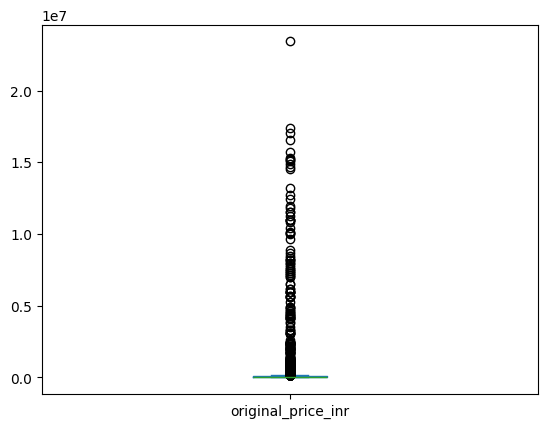

In [47]:
df['original_price_inr'].plot(kind='box')

In [48]:
df['original_price_inr'].describe()

,original_price_inr
count,5.499900e+04
mean,7.956066e+04
std,3.837915e+05
min,2.464970e+03
25%,2.441040e+04
50%,4.791238e+04
75%,9.127690e+04
max,2.344091e+07


In [49]:
Q1=df['original_price_inr'].quantile(0.25)
Q3=df['original_price_inr'].quantile(0.75)
Q3,Q1

(np.float64(91276.9), np.float64(24410.4))

In [50]:
IQR=Q3-Q1
IQR

np.float64(66866.5)

In [51]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [52]:
lower_limit,upper_limit

(np.float64(-75889.35), np.float64(191576.65))

In [53]:
df[((df['original_price_inr'] < lower_limit) | (df['original_price_inr'] > upper_limit))]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
32,TXN_2016_00000033,2016-01-13,CUST_2015_00011682,PROD_000107,Apple iPhone 7 32GB Black,Electronics,Smartphones,Apple,195853.44,5.45,185171.93,1,185171.93,0.0,185171.93,Chennai,Tamil Nadu,Metro,Premium,36-45,Net Banking,7,Standard,False,False,NaN,5.000000,Delivered,1,2016,1,0.22,True,4.2
149,TXN_2016_00000150,2016-01-22,CUST_2016_00018243,PROD_000107,Apple iPhone 7 32GB Black,Electronics,Smartphones,Apple,195853.44,69.45,59832.28,1,59832.28,0.0,59832.28,Hyderabad,Telangana,Metro,Premium,36-45,Credit Card,3,Standard,False,True,Republic Day Sale,4.316234,Delivered,1,2016,1,0.22,True,4.2
226,TXN_2016_00000227,2016-01-11,CUST_2016_00014462,PROD_000004,Apple iPhone 6 16GB White,Electronics,Smartphones,Apple,212889.01,0.00,212889.01,1,212889.01,0.0,212889.01,Kolkata,West Bengal,Metro,Premium,NaN,Credit Card,6,Standard,False,False,NaN,4.500000,Delivered,1,2016,1,0.21,True,4.1
271,TXN_2016_00000272,2016-01-09,CUST_2015_00006400,PROD_000107,Apple iPhone 7 32GB Black,Electronics,Smartphones,Apple,195853.44,0.00,195853.44,2,391706.88,NaN,391706.88,Bengaluru,Karnataka,Metro,Premium,36-45,Credit Card,3,Standard,False,False,NaN,4.316234,Delivered,1,2016,1,0.22,True,4.2
369,TXN_2016_00000370,2016-01-18,CUST_2016_00003696,PROD_002000,LG OLED TV Premium,Electronics,TV & Entertainment,LG,234409.14,0.00,234409.14,1,234409.14,0.0,234409.14,Chennai,Tamil Nadu,Metro,Premium,18-25,COD,4,Standard,False,False,NaN,4.000000,Delivered,1,2016,1,21.84,True,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54588,TXN_2016_00054589,2016-12-14,CUST_2015_00009479,PROD_000139,Samsung Galaxy S7 Edge 32GB Gold,Electronics,Smartphones,Samsung,8206071.00,0.00,82060.71,3,246182.13,0.0,246182.13,Chennai,Tamil Nadu,Metro,Premium,18-25,COD,3,Standard,False,False,NaN,4.316234,Delivered,12,2016,4,0.17,True,3.3
54617,TXN_2016_00054618,2016-12-16,CUST_2016_00018227,PROD_000123,Apple iPhone SE 32GB Black,Electronics,Smartphones,Apple,10971996.00,25.56,81677.26,1,81677.26,0.0,81677.26,Bengaluru,Karnataka,Metro,Standard,18-25,Net Banking,3,Standard,False,False,NaN,3.500000,Delivered,12,2016,4,0.23,False,4.7
54712,TXN_2016_00054713,2016-12-09,CUST_2016_00000942,PROD_000128,Samsung Galaxy S7 64GB Black,Electronics,Smartphones,Samsung,967708.00,0.00,96770.80,1,96770.80,0.0,96770.80,Indore,Madhya Pradesh,Tier1,Standard,NaN,COD,4,Standard,False,False,NaN,4.000000,Delivered,12,2016,4,0.23,True,4.7
54979,TXN_2016_00054980,2016-12-23,CUST_2016_00009698,PROD_002000,LG OLED TV Premium,Electronics,TV & Entertainment,LG,234409.14,24.28,177487.71,1,177487.71,0.0,177487.71,Kanpur,Uttar Pradesh,Tier1,Premium,NaN,COD,4,Standard,False,False,NaN,4.500000,Returned,12,2016,4,21.84,True,4.0


In [54]:
df=df[(df['original_price_inr']>=lower_limit)&(df['original_price_inr']<=upper_limit)]

In [55]:
df

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
0,TXN_2016_00000001,2016-01-27,CUST_2016_00002571,PROD_000124,Apple iPhone SE 16GB White,Electronics,Smartphones,Apple,101945.03,0.00,101945.03,3,305835.09,0.0,305835.09,Pune,Maharashtra,Tier1,Standard,26-35,COD,3,Standard,False,False,NaN,4.316234,Delivered,1,2016,1,0.23,True,4.6
1,TXN_2016_00000002,2016-01-07,CUST_2016_00003513,PROD_001612,Apple Pavilion 8GB RAM Silver,Electronics,Laptops,Apple,52750.75,14.72,44987.09,2,89974.19,0.0,89974.19,Lucknow,Uttar Pradesh,Tier1,Budget,36-45,COD,15,Standard,False,False,NaN,4.316234,Delivered,1,2016,1,2.69,True,3.7
2,TXN_2016_00000003,2016-01-28,CUST_2015_00001993,PROD_001751,Realme Slate 4GB RAM Black,Electronics,Tablets,Realme,18238.60,0.00,18238.60,3,54715.80,0.0,54715.80,Mumbai,Maharashtra,Metro,Standard,36-45,COD,5,Standard,False,False,NaN,5.000000,Delivered,1,2016,1,0.59,True,3.9
3,TXN_2016_00000004,NaT,CUST_2016_00003593,PROD_000154,Samsung Galaxy J7 Prime 16GB Gold,Electronics,Smartphones,Samsung,33118.39,44.96,18228.86,1,18228.86,0.0,18228.86,Ahmedabad,Gujarat,Tier1,Budget,18-25,Credit Card,5,Standard,False,True,Republic Day Sale,4.500000,Delivered,1,2016,1,0.17,True,3.4
4,TXN_2016_00000005,2016-01-26,CUST_2016_00015048,PROD_001710,Lenovo Tab M10 8GB RAM Black,Electronics,Tablets,Lenovo,59718.16,49.77,29997.57,1,29997.57,0.0,29997.57,Delhi,Delhi,Metro,Standard,18-25,COD,4,Standard,False,True,Republic Day Sale,4.316234,Delivered,1,2016,1,0.49,True,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54995,TXN_2016_00054996,2016-12-03,CUST_2016_00009218,PROD_000035,Samsung Galaxy S6 Edge 32GB Blue,Electronics,Smartphones,Samsung,117936.30,0.00,117936.30,1,117936.30,NaN,117936.30,Bengaluru,Karnataka,Metro,Premium,NaN,Credit Card,4,Standard,False,False,NaN,3.000000,Delivered,12,2016,4,0.16,False,3.6
54996,TXN_2016_00054997,2016-12-09,CUST_2015_00001753,PROD_000066,Xiaomi Mi 4i 64GB Black,Electronics,Smartphones,Xiaomi,30660.88,0.00,30660.88,3,91982.64,0.0,91982.64,Bengaluru,Karnataka,Metro,Standard,NaN,Credit Card,3,Standard,False,False,NaN,5.000000,Delivered,12,2016,4,0.19,True,4.2
54997,TXN_2016_00054998,2016-12-18,CUST_2016_00019852,PROD_000095,Motorola Moto X Play 16GB White,Electronics,Smartphones,Motorola,23059.33,14.56,19701.57,2,39403.14,0.0,39403.14,Meerut,Uttar Pradesh,Rural,Budget,26-35,COD,3,Standard,False,False,NaN,4.000000,Returned,12,2016,4,0.16,False,3.7
54998,TXN_2016_00054999,NaT,CUST_2016_00007996,PROD_000005,Apple iPhone 6 32GB White,Electronics,Smartphones,Apple,115439.51,0.00,115439.51,1,115439.51,0.0,115439.51,Ahmedabad,Gujarat,Tier1,Premium,36-45,COD,6,Standard,False,False,NaN,3.000000,Delivered,12,2016,4,0.20,True,3.8


#Question 10
Payment methods contain inconsistent naming: 'UPI/PhonePe/GooglePay', 'Credit Card/CREDIT_CARD/CC', 'Cash on Delivery/COD/C.O.D'. Standardize payment method categories and create a clean categorical hierarchy.


In [56]:
df['payment_method'].unique()

array(['COD', 'Credit Card', 'Debit Card', 'Net Banking', 'UPI'],
      dtype=object)

In [57]:
mapping_payment_method = {
    'COD': 'Cash',
    'UPI': 'UPI',
    'Debit Card': 'Card',
    'Credit Card': 'Card',
    'Net Banking': 'Online Banking',
    'Wallet': 'Wallet',
    'BNPL': 'BNPL'
}

df['payment_method'] = df['payment_method'].replace(mapping_payment_method)

In [58]:
df['payment_method'].unique()

array(['Cash', 'Card', 'Online Banking', 'UPI'], dtype=object)

In [59]:
df.isnull().sum()

,0
transaction_id,0
order_date,5180
customer_id,0
product_id,0
product_name,0
category,0
subcategory,0
brand,0
original_price_inr,0
discount_percent,0


In [60]:
df['delivery_charges'].sample(10)

,delivery_charges
9860,0.0
6674,0.0
9138,0.0
43469,0.0
26339,0.0
25429,0.0
19369,0.0
28579,0.0
24508,0.0
50268,NaN


In [61]:
df['delivery_charges'].isnull().sum()

np.int64(4337)

In [62]:
df['delivery_charges']=df['delivery_charges'].fillna(df['delivery_charges'].mean())

In [63]:
df['customer_age_group'].unique()

array(['26-35', '36-45', '18-25', nan, '46-55', '55+'], dtype=object)

In [64]:
mapping_age_group = {
    '18-25': 'Group-1',
    '26-35': 'Group-2',
    '36-45': 'Group-3',
    '46-55': 'Group-4',
    '55+':   'Group-5'
}

df['customer_age_group'] = df['customer_age_group'].replace(mapping_age_group)

In [65]:
df['customer_age_group'].unique()

array(['Group-2', 'Group-3', 'Group-1', nan, 'Group-4', 'Group-5'],
      dtype=object)

In [66]:
# df['customer_age_group'].mode()[0]
df['customer_age_group']=df['customer_age_group'].fillna(df['customer_age_group'].mode()[0])

In [67]:
df['customer_age_group'].isnull().sum()

np.int64(0)

In [68]:
df.isnull().sum()

,0
transaction_id,0
order_date,5180
customer_id,0
product_id,0
product_name,0
category,0
subcategory,0
brand,0
original_price_inr,0
discount_percent,0


In [69]:
df=df.drop(columns=['festival_name'])

In [70]:
df.isnull().sum()

,0
transaction_id,0
order_date,5180
customer_id,0
product_id,0
product_name,0
category,0
subcategory,0
brand,0
original_price_inr,0
discount_percent,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54332 entries, 0 to 54999
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   transaction_id          54332 non-null  object        
 1   order_date              49152 non-null  datetime64[ns]
 2   customer_id             54332 non-null  object        
 3   product_id              54332 non-null  object        
 4   product_name            54332 non-null  object        
 5   category                54332 non-null  object        
 6   subcategory             54332 non-null  object        
 7   brand                   54332 non-null  object        
 8   original_price_inr      54332 non-null  float64       
 9   discount_percent        54332 non-null  float64       
 10  discounted_price_inr    54332 non-null  float64       
 11  quantity                54332 non-null  int64         
 12  subtotal_inr            54332 non-null  float64    

In [73]:
df.to_csv('cleaned_2016.csv')